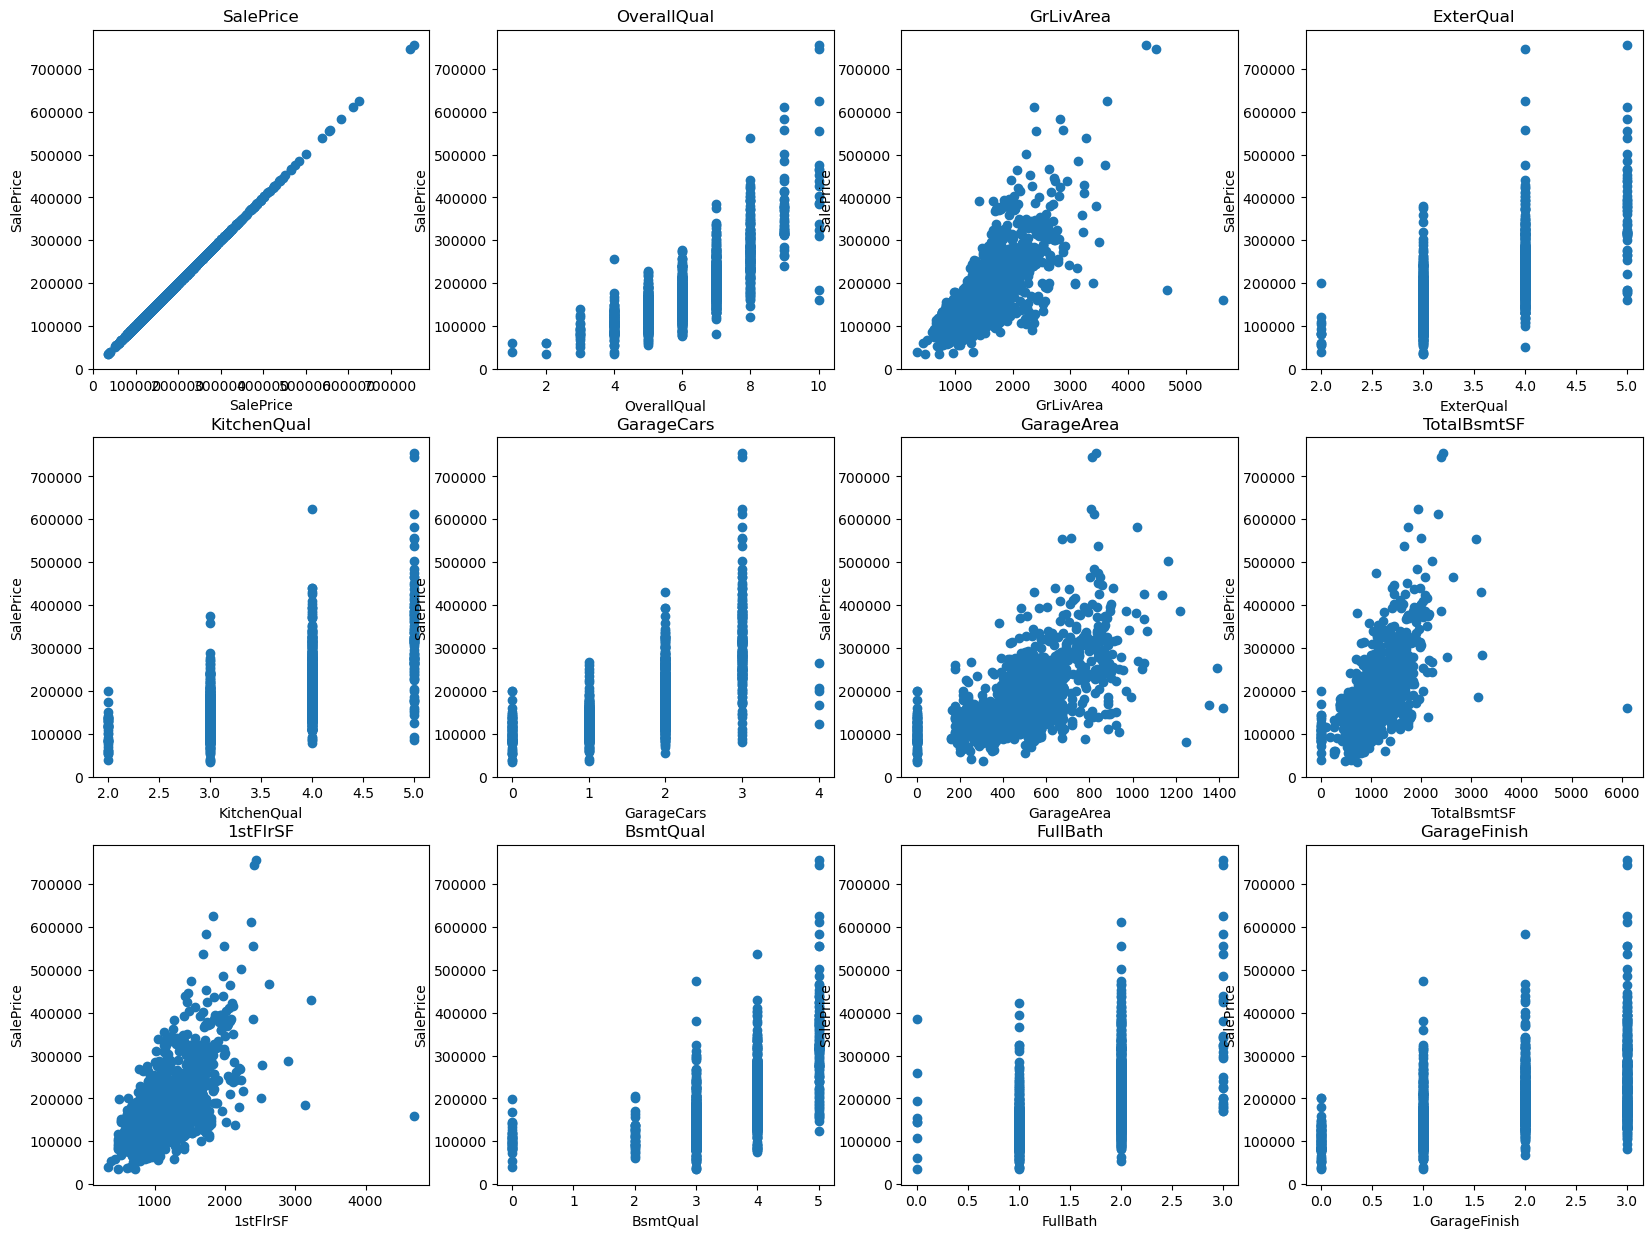

In [130]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from tqdm.notebook import tqdm

# set seeds

np.random.seed(42)

%run 01_get_prepared_dataset.ipynb

df=pd.read_csv('train.csv')

X_train, X_test, y_train, y_test = get_train_test(df)

In [131]:
X_train.shape

(1168, 152)

In [132]:
%run 03_get_models.ipynb

Models loaded


In [133]:
for key, model in tqdm(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # rmse
    print("rmse", key, np.sqrt(np.mean((y_pred - y_test)**2)))
    

  0%|          | 0/11 [00:00<?, ?it/s]

rmse KNeighborsRegressor 0.20943964850028993
rmse LinearRegression 0.11821711086980034
rmse DecisionTreeRegressor 0.20798581394753457
rmse RandomForestRegressor 0.15467657253495543
rmse AdaBoostRegressor 0.17865972182387857
rmse GradientBoostingRegressor 0.1341291409386971
rmse SVR 0.19916458117396846
rmse CatBoostRegressor 0.13103272680266745
rmse XGBRegressor 0.12991590294262217
rmse ElasticNet 0.17650248804546348
rmse BaggingRegressor 0.1538039734835305


In [134]:
estimators=[
    ('LinearRegression', models['LinearRegression']),
   # ('RandomForestRegressor', models['RandomForestRegressor']),
    ('XGBRegressor', models['XGBRegressor']),
    ('GradientBoostingRegressor', models['GradientBoostingRegressor']),
    ('CatBoostRegressor', models['CatBoostRegressor'])
]
    
from sklearn.ensemble import VotingRegressor

votingRegressor = VotingRegressor(estimators=estimators, n_jobs=-1, verbose=True)

votingRegressor.fit(X_train, y_train)

y_pred = votingRegressor.predict(X_test)

from sklearn.metrics import mean_squared_error

print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

#RMSE:  0.13249205660561417
# rmse with reduce features 0.12947195978224865
# with clamp 0.12864582793302343

[Voting] ......... (1 of 4) Processing LinearRegression, total=   0.0s
[Voting]  (3 of 4) Processing GradientBoostingRegressor, total=   0.7s
[Voting] ............. (2 of 4) Processing XGBRegressor, total=   0.8s
[Voting] ........ (4 of 4) Processing CatBoostRegressor, total=   1.0s
RMSE:  0.12212545226053492


In [135]:
df_test=pd.read_csv('test.csv')

df_test=prepare_data(df_test, test=True)
df_test

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_nan,LotShape_IR1,LotShape_IR2,LotShape_Reg,...,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,PoolQC
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,730.0,3.0,3.0,140,0,0,120,0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,312.0,3.0,3.0,393,36,0,0,0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,2.0,482.0,3.0,3.0,212,34,0,0,0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,2.0,470.0,3.0,3.0,360,36,0,0,0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,2.0,506.0,3.0,3.0,0,82,0,144,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0
1455,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,286.0,3.0,3.0,0,24,0,0,0,0.0
1456,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,2.0,576.0,3.0,3.0,474,0,0,0,0,0.0
1457,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,80,32,0,0,0,0.0


In [136]:
y_test_pred = votingRegressor.predict(df_test)
y_test_saleprices=np.exp(y_test_pred)

df_submission=pd.DataFrame({'Id': pd.read_csv("test.csv")["Id"], 'SalePrice': y_test_saleprices})
df_submission.to_csv('submission.csv', index=False)